In [2]:
%run SAT_help_functions.ipynb

datasets = ['Dutilh2013', 'Dutilh2019', 'Evans2017', 'Lerche2017', 'Rae2014', 'Wagenmakers2008']
dataset_names = ['Dutilh 2013', 'Dutilh 2019', 'Evans 2017', 'Lerche 2017', 'Rae 2014', 'Wagenmakers 2008']

## Using function to plot

In [2]:


def BIC_to_likelihood(BIC, k, n):
    x = np.exp((-BIC+k*np.log(n))/2)
    if x < np.log(2.2E-308):
        return 2.2E-308
    if x > np.log(1.7E+308):
        return 1.7E+308
    return x

In [27]:
df = pd.read_csv("Parameter Estimates/DDM2v2a2c2terresultWagenmakers2008.csv")

In [28]:
df_n = pd.read_csv("Parameter Estimates/n_Wagenmakers2008.csv")

In [29]:
df["n"] = df_n["N"]
df["k"] = [len(df.columns)-5]*len(df)
df["ll"] = df["BIC"] - df["k"]*np.log(df["n"])

In [34]:

df.groupby('Participant')[['ll']].sum() + df.groupby('Participant')[['k']].mean()*np.log(df.groupby('Participant')[['n']].sum())





,k,ll,n
Participant,,,
1,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN
10,NaN,NaN,NaN


,n
Participant,
1,913
3,958
4,961
5,932
6,935
7,954
8,910
9,961
10,1827


,k
Participant,
1,8.0
3,8.0
4,8.0
5,8.0
6,8.0
7,8.0
8,8.0
9,8.0
10,8.0


In [30]:
df

,Unnamed: 0,Drift Rate Speed,Drift Rate Accuracy,BSpeed,BAcc,Collapse Speed,Collapse Accuracy,Non-decision Time Speed,Non-decision Time Accuracy,BIC,Frequency,Participant,n,k,ll
0,0,3.004488,3.550522,0.516220,0.569945,0.000000,0.636364,0.357856,0.377005,-258.758052,1,1,156,8,-299.156900
1,0,2.402747,2.310603,0.503449,0.599552,0.466667,0.085711,0.377105,0.379175,-131.605080,2,1,150,8,-171.690162
2,0,0.893472,1.762489,0.546061,0.537191,0.289474,0.068181,0.346250,0.399448,-13.165765,3,1,157,8,-53.615731
3,0,2.336344,2.847524,0.500203,0.503030,0.000208,0.081876,0.344316,0.393658,-160.678389,4,1,147,8,-200.601849
4,0,3.127804,2.542635,0.560067,0.666177,0.081395,0.460524,0.357555,0.354519,-164.218917,5,1,148,8,-204.196615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,2.473551,2.402917,0.813833,0.927307,0.826087,0.133394,0.311746,0.406767,-204.242102,2,17,309,8,-250.108832
92,0,1.741959,1.688959,0.572304,0.704000,0.145410,0.000081,0.331606,0.464750,7.393102,3,17,306,8,-38.395579
93,0,2.097835,2.617806,0.750649,1.076347,0.515152,0.217062,0.317224,0.410499,-139.688114,4,17,305,8,-185.450608
94,0,2.344213,2.208976,0.824453,0.952635,0.800000,0.225000,0.320416,0.414808,-147.625200,5,17,301,8,-193.282082


8

<Axes: xlabel='Frequency', ylabel='Boundary Separation Speed'>

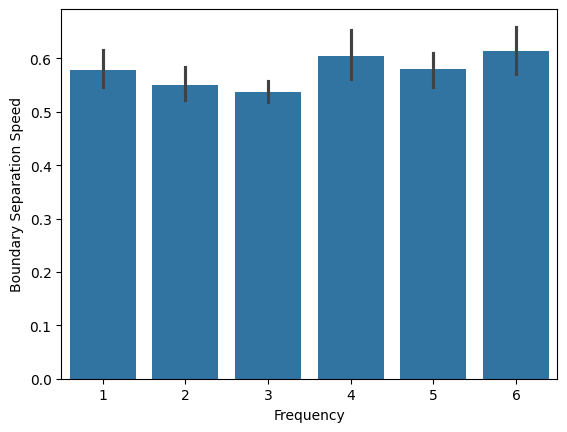

In [10]:
sns.barplot(df, x = "Frequency", y = "Boundary Separation Speed")

<Axes: xlabel='Frequency', ylabel='Boundary Separation Accuracy'>

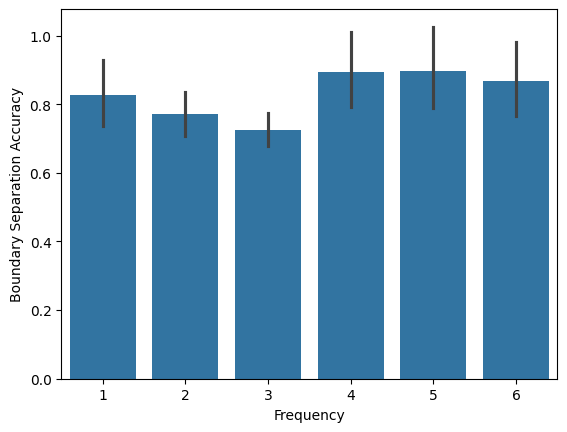

In [11]:
sns.barplot(df, x = "Frequency", y = "Boundary Separation Accuracy")

In [5]:
df = pd.read_csv("Parameter Estimates/OUM2v2k2terresultWagenmakers2008.csv")

<Axes: xlabel='Frequency', ylabel='Boundary Separation'>

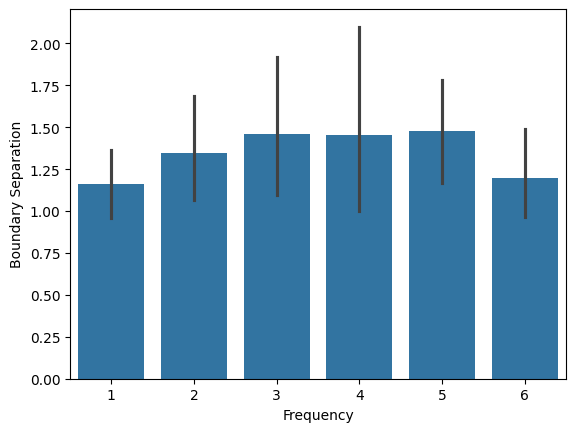

In [6]:
sns.barplot(df, x = "Frequency", y = "Boundary Separation")

In [39]:
def BIC_to_exp(BIC):
    return np.exp(-BIC/2)
def BIC_to_likelihood(BIC, k, n):
    return np.exp((-BIC+k*np.log(n))/2)
#dataset = "Dutilh2019"
#models = ["DDM2v2c2ter","OUM2v2k2ter"] 
#sortby = "OUM2v2k2ter"
def plot_BIC_comparison(ax,dataset, models, sortby = "OUM2v2k2ter"):

    BIC_all = pd.DataFrame(columns = models)
    for model in models:
        if dataset=="Wagenmakers2008":
            BIC_all[model] = pd.DataFrame(np.array(pd.read_csv("Parameter Estimates/"+model+"resultWagenmakers2008.csv").groupby('Participant')[['BIC']].mean()), columns = ["BIC"])
        else:
            if model == "DDM2v1sv2a2ter" or model == "DDMfull":
                bic_dir = "/Users/wangjiashun/Desktop/Reserach on SAT/datasets/transformed/"+model+"_"
                BIC_all[model] = pd.read_csv(bic_dir+dataset+".csv").astype('float64')[['BIC']]                
            else:
                BIC_all[model] = pd.read_csv("Parameter Estimates/"+model+"result"+dataset+".csv").astype('float64')[['BIC']]
    # solving the numerical issue
    for i in range(len(BIC_all)):
        tmp_max = np.max(np.array(BIC_all.loc[[i]]))
        tmp_min = np.min(np.array(BIC_all.loc[[i]]))
        np_max = -np.log(2.2E-308)/2 # 354
        np_min = -np.log(1.7E+308)/2 # -354

        if tmp_max > np_max and tmp_min < np_min:
            for model in models:
                if BIC_all.loc[i,model] > np_max:
                    BIC_all.loc[i,model] = np_max
                if BIC_all.loc[i,model] < np_min:
                    BIC_all.loc[i,model] = np_min

        elif tmp_max > np_max and tmp_min > np_min:
            dif_max = tmp_max-np_max
            BIC_all.loc[[i]] -= dif_max
        elif tmp_min < np_min and tmp_max < np_max:
            dif_min = tmp_min - np_min
            BIC_all.loc[[i]] -= dif_min

    for model in models:
        BIC_all[model] = BIC_to_exp(BIC_all[model])

    BIC_all["Sum"] = BIC_all.sum(axis = 1)

    for model in models:
        BIC_all[model] = BIC_all[model]/BIC_all["Sum"]

    BIC_all = BIC_all.drop(labels = 'Sum',axis = 1)
    BIC_all = BIC_all.sort_values(by = sortby, axis = 0)
    BIC_all = BIC_all.reset_index(drop=True)
    BIC_all.index += 1
    if models==["DDM2v2a2ter","OUM2v2k2ter"]:
        color=["#ff7f0e", "#1f77b4"]
    elif models==["OUM2v2a2ter","OUM2v2k2ter"]:
        color=["#a1c9f4",'#1f77b4']
    elif models == ["OUM2v2a2k2ter","OUM2v2k2ter","OUM2k2ter"]:
        color=["#a1c9f4",'#699ADD','#1f77b4'] #3179C6 88BDDF
    else:
        color=["#F29A2E", "#1f77b4"]
        
    return BIC_all.plot(ax = ax, kind='bar', title = dataset, legend =False, stacked=True, width=1,edgecolor='black'
                        ,color=color)

# DDM vs OUMk    ["#ff7f0e", "#1f77b4"]

# OUMa vs OUMk   ["#a1c9f4",'#1f77b4']

# DDMc vs OUMk   ["#F29A2E", "#1f77b4"]


In [3]:
def plot_all_datasets(models, labels, sortby, xlabelsize=15, titlesize = 20, figsize=(18, 12)):
    figure, axes = plt.subplots(2,3,figsize=figsize)
    plot_BIC_comparison(ax = axes[0,0],dataset = "Dutilh2013", models = models, sortby = sortby)
    plot_BIC_comparison(ax = axes[0,1],dataset = "Dutilh2019", models = models, sortby = sortby) # float 128 issue
    plot_BIC_comparison(ax = axes[0,2],dataset = "Evans2017", models = models, sortby = sortby)
    plot_BIC_comparison(ax = axes[1,0],dataset = "Lerche2017", models = models, sortby = sortby)
    plot_BIC_comparison(ax = axes[1,1],dataset = "Rae2014", models = models, sortby = sortby)
    plot_BIC_comparison(ax = axes[1,2],dataset = "Wagenmakers2008", models = models, sortby = sortby) # float 128 issue
    
    axes[0,0].set_title("Dutilh2013",fontsize = titlesize)
    axes[0,1].set_title("Dutilh2019",fontsize = titlesize)
    axes[0,2].set_title("Evans2017",fontsize = titlesize)
    axes[1,0].set_title("Lerche2017",fontsize = titlesize)
    axes[1,1].set_title("Rae2014",fontsize = titlesize)
    axes[1,2].set_title("Wagenmakers2008",fontsize = titlesize)
    axes[1,0].set_xlabel("Participants", fontsize = xlabelsize)
    axes[1,1].set_xlabel("Participants", fontsize = xlabelsize)
    axes[1,2].set_xlabel("Participants", fontsize = xlabelsize)

    axes[0,2].legend(labels = labels, loc='upper left', bbox_to_anchor=(1.03, 1))

In [4]:
def plot_all_datasets_flat(models, labels, sortby, xlabelsize=15, titlesize = 20, figsize=(30, 4)):
    sns.set_style("whitegrid", {'axes.grid' : False})
    figure, axes = plt.subplots(1,6,figsize=figsize)
    for i in range(6):
        plot_BIC_comparison(ax = axes[i],dataset = datasets[i], models = models, sortby = sortby)
        axes[i].set_title(dataset_names[i],fontsize = titlesize, fontweight='bold', fontname='Arial')
        axes[i].set_xlabel("Participants", fontsize = xlabelsize, fontname='Arial')
        axes[i].set_ylim(0,1)
        axes[i].tick_params(axis='both', which='major', labelsize=7)
    axes[0].set_ylabel('Model Weight', fontsize=xlabelsize, fontname='Arial')
    axes[5].legend(labels = labels, loc='upper left', bbox_to_anchor=(1.03, 1),fontsize=10)


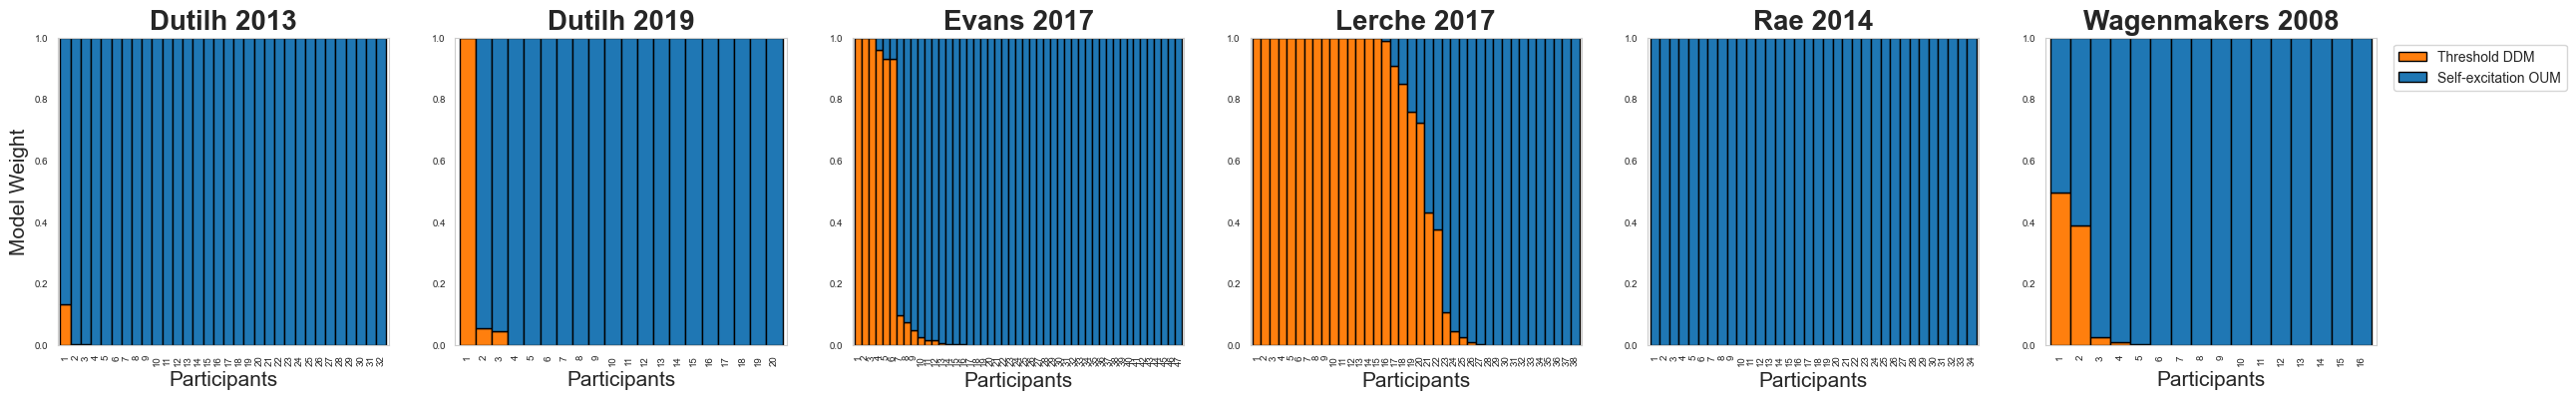

In [12]:
models = ["DDM2v2a2ter","OUM2v2k2ter"] 
labels = ["Threshold DDM","Self-excitation OUM"] 
plot_all_datasets_flat(models, labels, sortby = "OUM2v2k2ter")

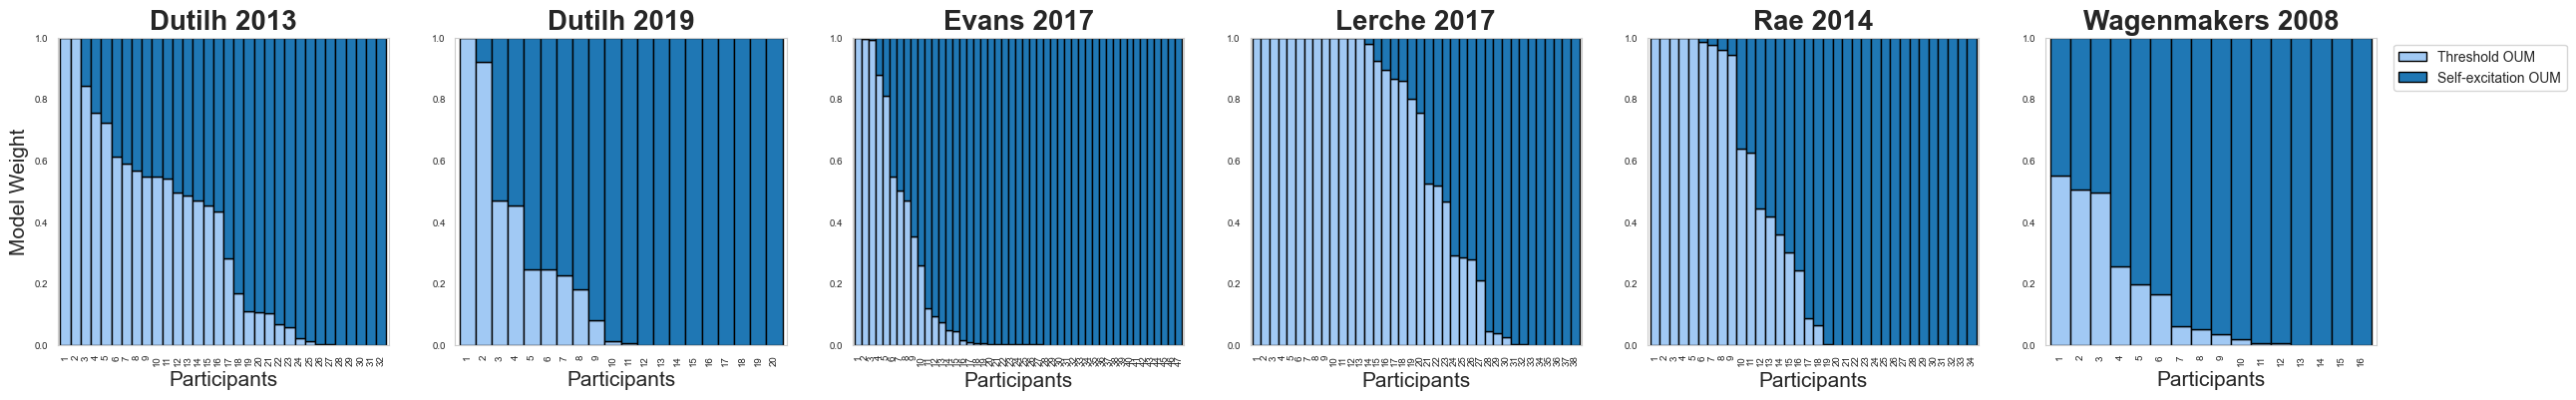

In [6]:
models = ["OUM2v2a2ter","OUM2v2k2ter"] 
labels = ["Threshold OUM","Self-excitation OUM"] 
sortby = "OUM2v2k2ter"
plot_all_datasets_flat(models, labels, sortby = "OUM2v2k2ter")

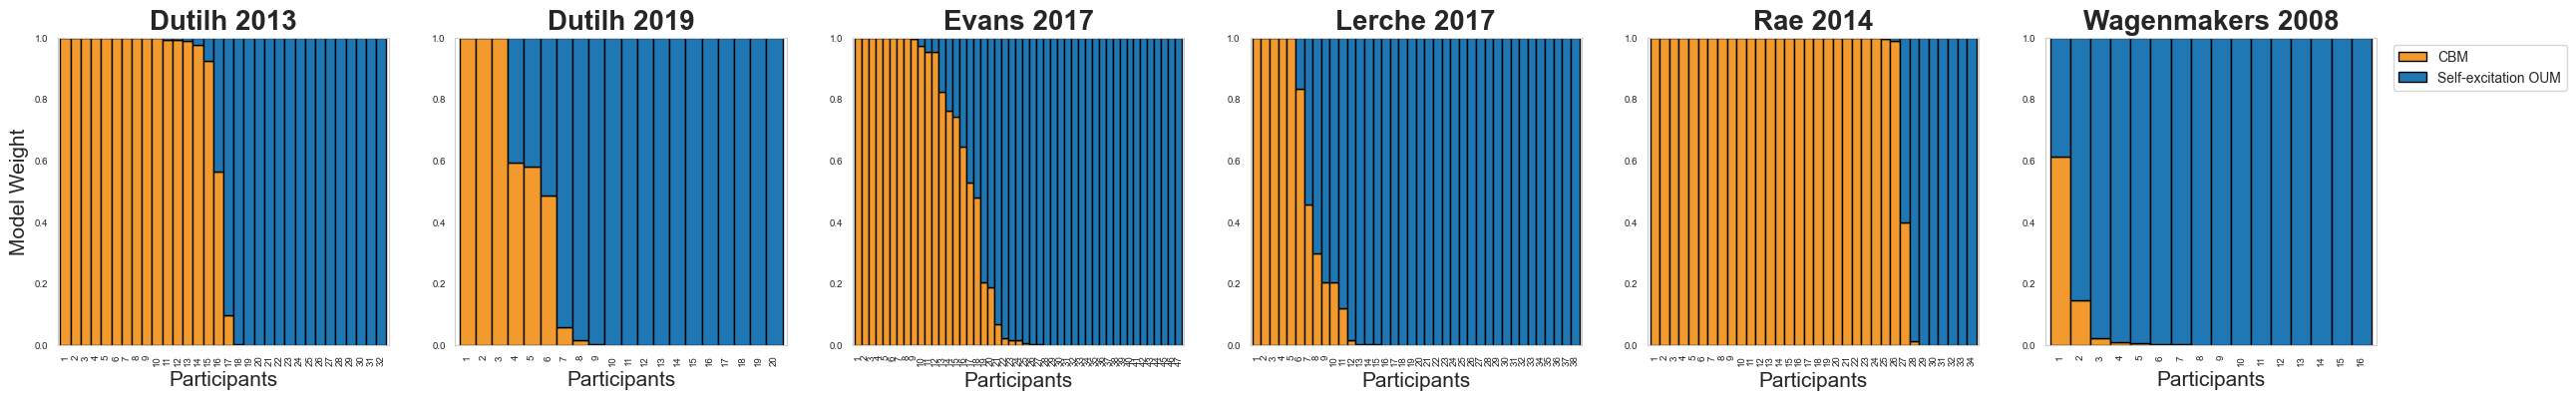

In [7]:
models = ["DDM2v2a2Weibull2ter","OUM2v2k2ter"] 
labels = ["CBM","Self-excitation OUM"] 
sortby = "OUM2v2k2ter"
plot_all_datasets_flat(models, labels, sortby = "OUM2v2k2ter")

## Supplementary materials

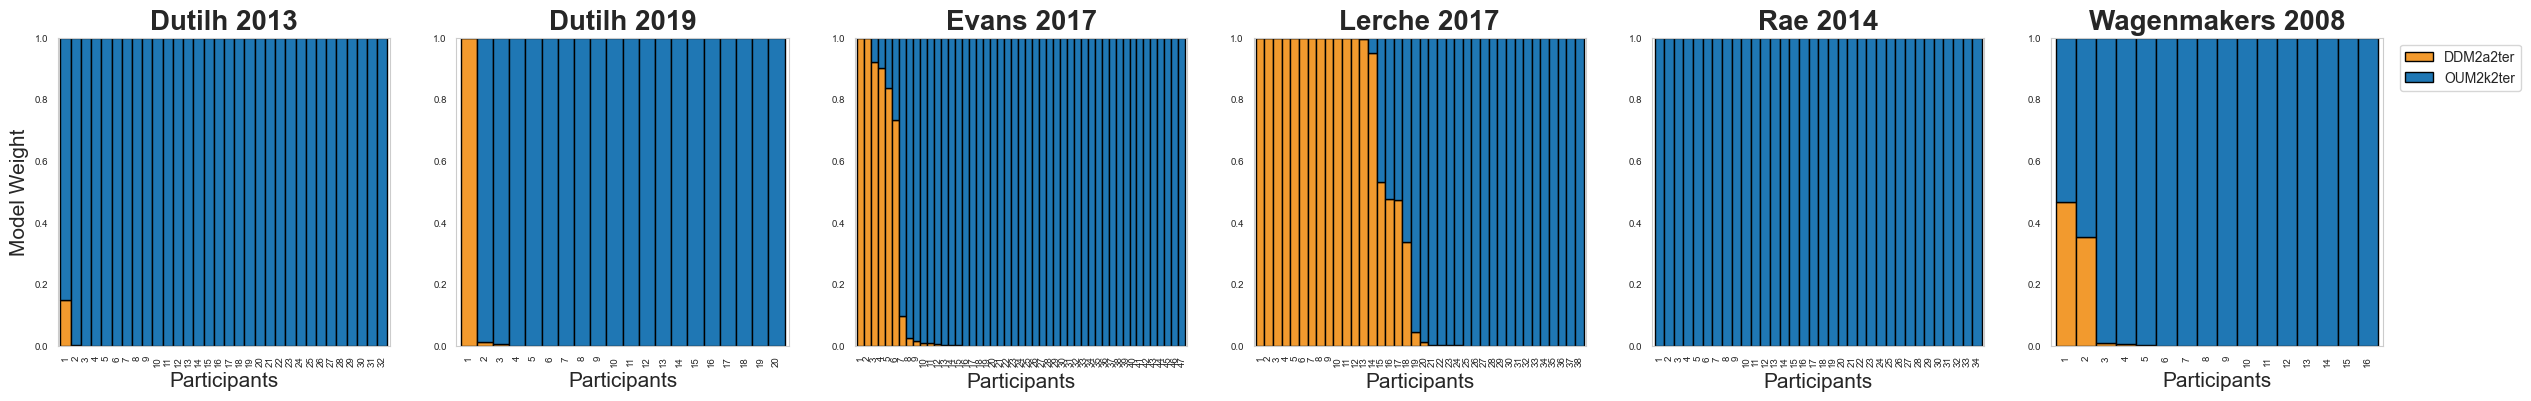

In [16]:
models = ["DDM2a2ter","OUM2k2ter"] 
labels = ["DDM2a2ter","OUM2k2ter"] 
plot_all_datasets_flat(models, labels, sortby = "OUM2k2ter")

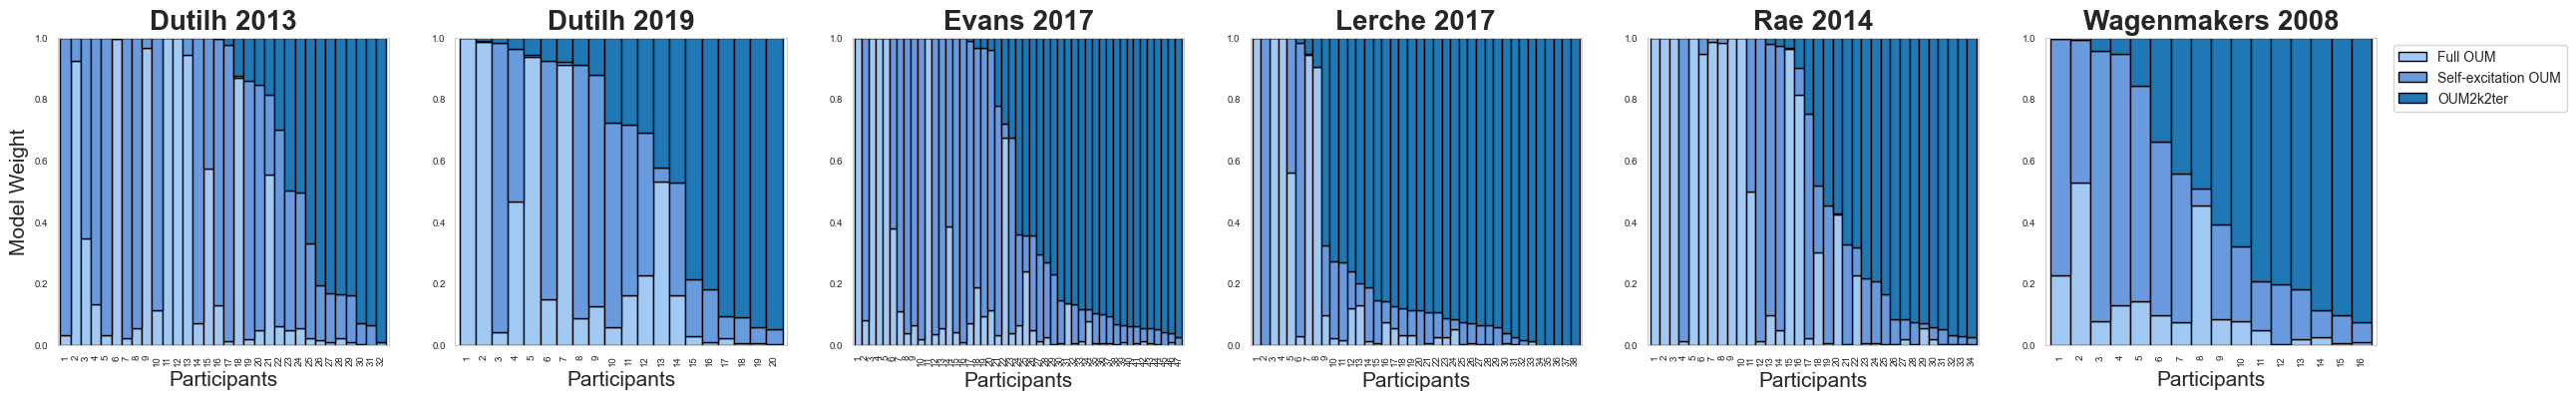

In [42]:
models = ["OUM2v2a2k2ter","OUM2v2k2ter","OUM2k2ter"] 
labels = ["Full OUM","Self-excitation OUM","OUM2k2ter"] 
plot_all_datasets_flat(models, labels, sortby = "OUM2k2ter")

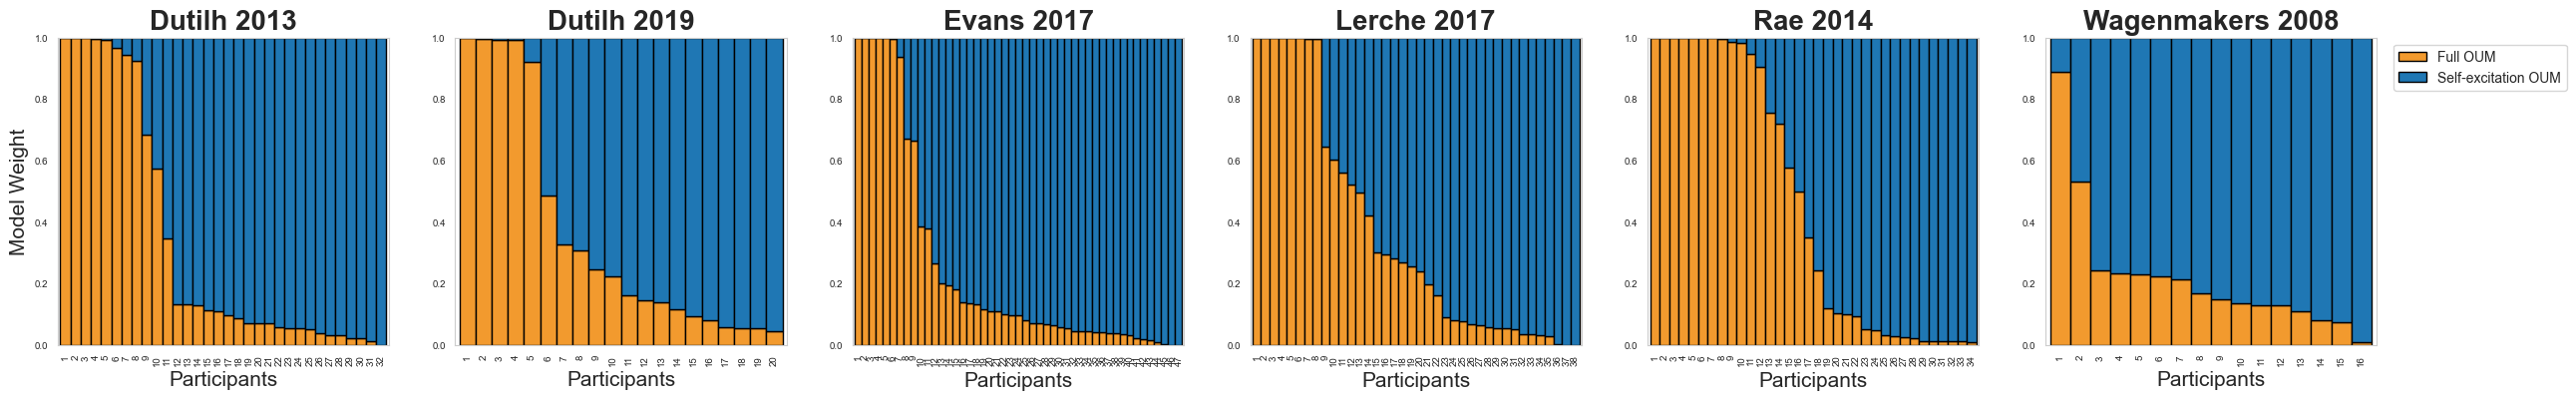

In [10]:
models = ["OUM2v2a2k2ter","OUM2v2k2ter"] 
labels = ["Full OUM","Self-excitation OUM"] 
plot_all_datasets_flat(models, labels, sortby = "OUM2v2k2ter")

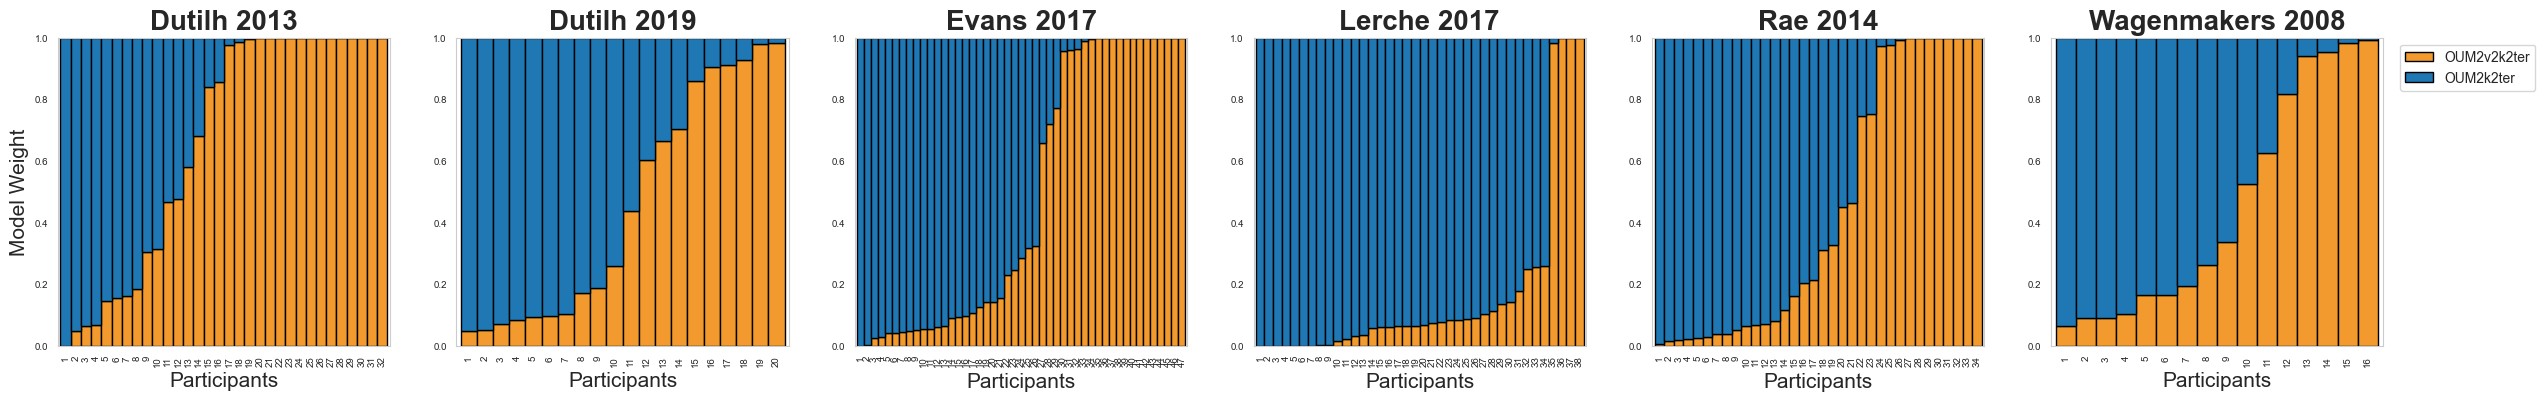

In [20]:
models = ["OUM2v2k2ter","OUM2k2ter"] 
labels = ["OUM2v2k2ter","OUM2k2ter"] 
plot_all_datasets_flat(models, labels, sortby = "OUM2v2k2ter")

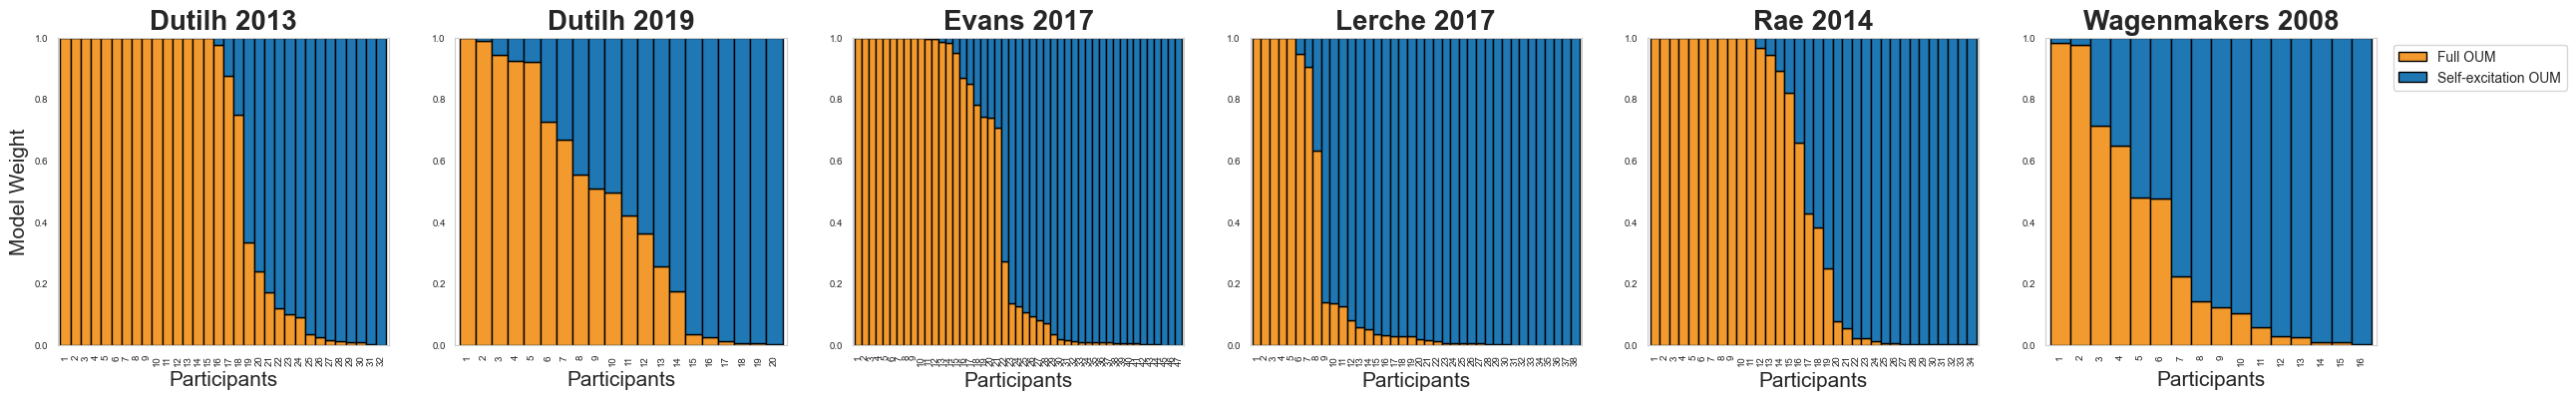

In [23]:
models = ["OUM2v2a2k2ter","OUM2k2ter"] 
labels = ["Full OUM","Self-excitation OUM"] 
plot_all_datasets_flat(models, labels, sortby = "OUM2k2ter")

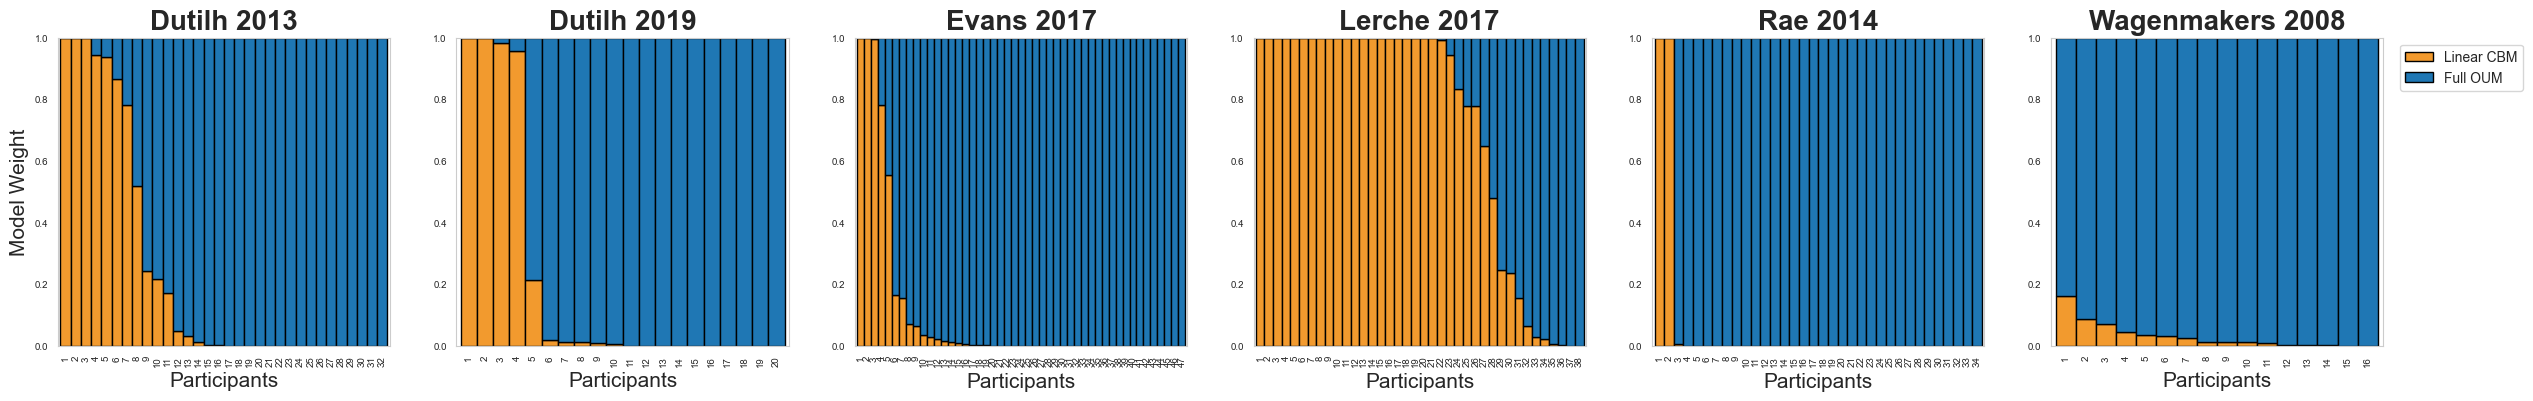

In [21]:
models = ["DDM2v2a2c2ter","OUM2v2k2ter"] 
labels = ["Linear CBM","Full OUM"] 
plot_all_datasets_flat(models, labels, sortby = "OUM2v2k2ter")

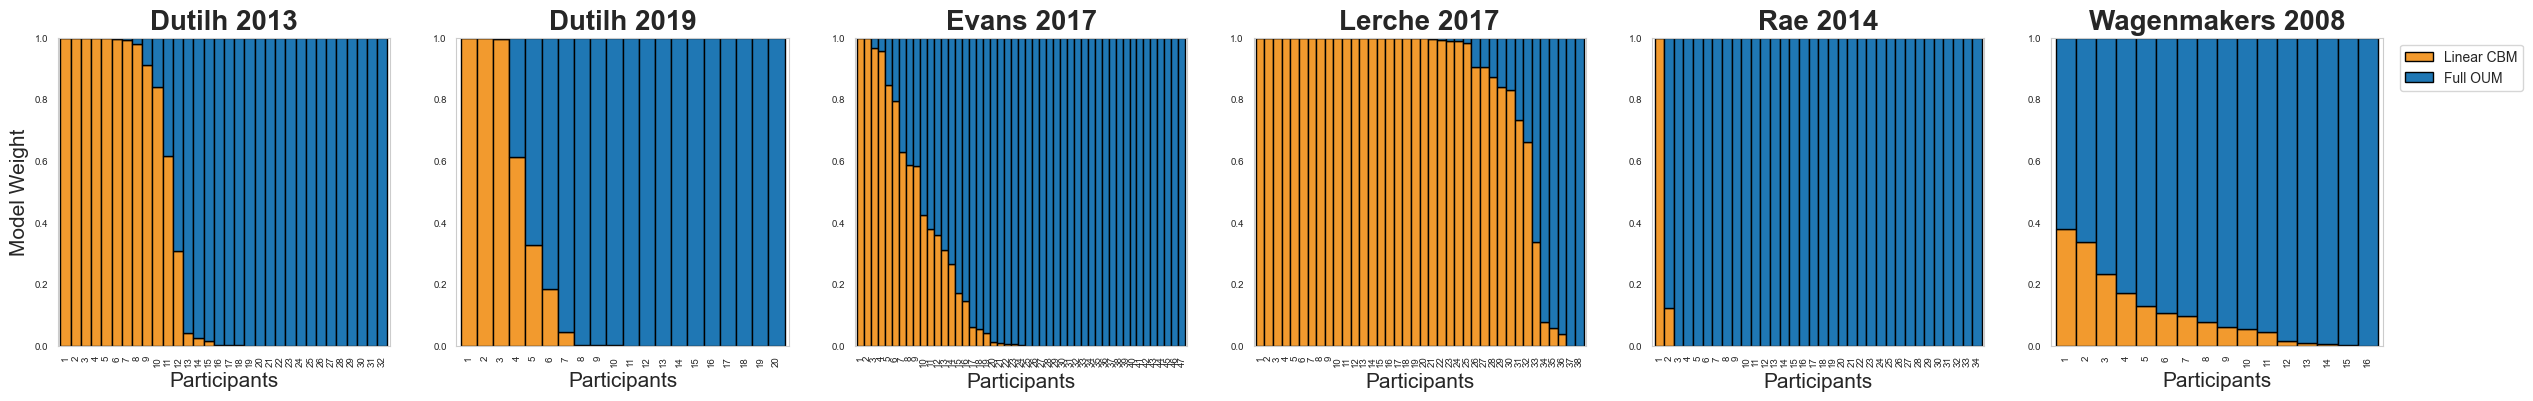

In [18]:
models = ["DDM2v2a2c2ter","OUM2v2a2k2ter"] 
labels = ["Linear CBM","Full OUM"] 
plot_all_datasets_flat(models, labels, sortby = "OUM2v2a2k2ter")

In [78]:
pal = sns.color_palette()

In [98]:
pal.as_hex()[0]


'#1f77b4'

In [141]:
def get_Weibull(t,a=2,a_prime=1.5,lam=1,k=3):
    first = 1-np.exp(-(t/lam)**k)
    second = a - a_prime
    return (a - first*second)

In [144]:
def plot_boundary(ax,dataset):
    
    if ax is None:
        ax = plt.gca()
    T_dur = 1.5
    
    t = np.arange(0,5,0.01)
    param = pd.read_csv("Parameter Estimates/DDM2v2a2Weibull2terresult"+dataset+".csv")             
    param_mean = param.mean(axis=0)
    a_speed = get_Weibull(t,a=param_mean["Boundary Separation Speed"],
                           a_prime=param_mean["aprimeSpeed"],
                           lam=param_mean["lamSpeed"],k=3)
    a_acc = get_Weibull(t,a=param_mean["Boundary Separation Accuracy"],
                           a_prime=param_mean["aprimeAcc"],
                           lam=param_mean["lamAcc"],k=3)
    #['#1f77b4', '#ff7f0e'
    ax.plot(t, a_speed, color="#1f77b4")
    ax.plot(t, a_acc, color="#ff7f0e")
    ax.plot(t, -a_speed, color="#1f77b4")
    ax.plot(t, -a_acc, color="#ff7f0e")
    ax.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
    ax.axis('off')

    t_max = next(a[0] for a in enumerate(a_acc) if a[1]-param_mean["aprimeAcc"] < 0.001)
    ax.set_xlim(0,t[t_max])

    #ax.legend(["Boundary (Speed)", "Boundary (Accuracy)"])
    
    #return ax


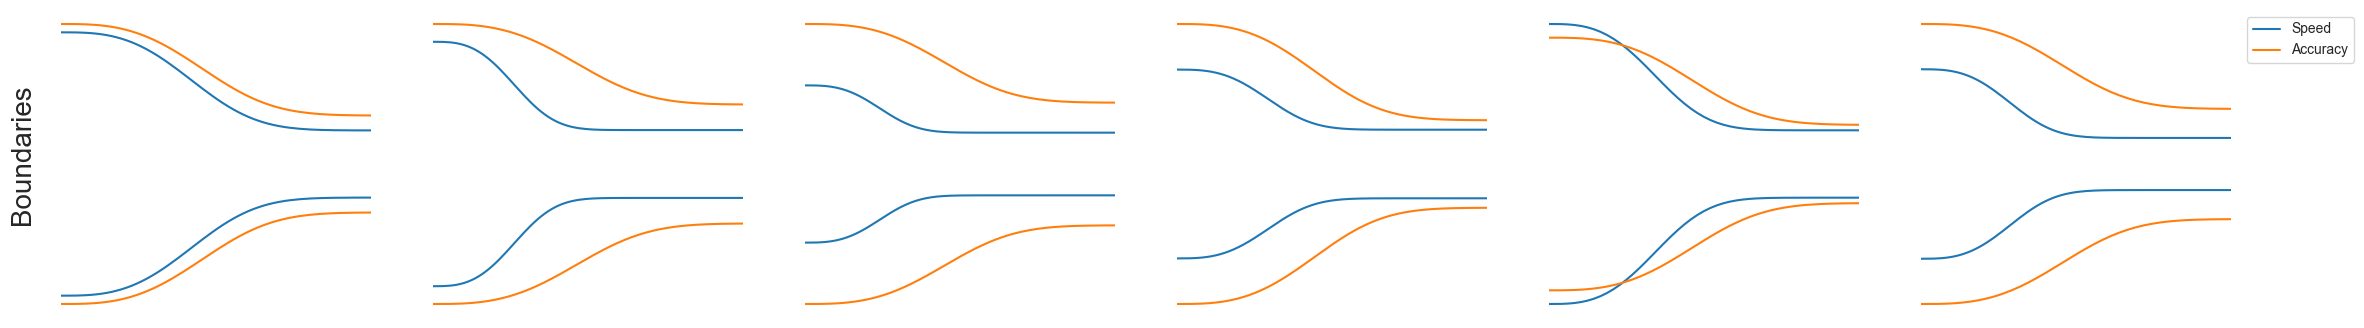

In [145]:
def plot_all_boundaries(xlabelsize=15, titlesize = 20, figsize=(28, 4)):
    sns.set_style("whitegrid", {'axes.grid' : False})
    figure, axes = plt.subplots(1,6,figsize=figsize)
    for i in range(6):
        plot_boundary(ax = axes[i],dataset = datasets[i])
        axes[i].set_title("")
        #axes[i].set_title(dataset_names[i],fontsize = titlesize, fontweight='bold', fontname='Arial')
        #axes[i].set_xlabel("Time", fontsize = xlabelsize, fontname='Arial')
        #axes[i].set_xlim(0,t_max)
        #axes[i].set_ylim(0,3.5)
        axes[i].set_ylabel("Boundaries")
        axes[i].tick_params(axis='both', which='major', labelsize=7)
        
    axes[0].text(x=-0.1, y=-0.5,s="Boundaries",size=20, rotation = "vertical")

    axes[5].legend(labels =["Speed", "Accuracy"], loc='upper left', bbox_to_anchor=(1.03, 1),fontsize=10)
plot_all_boundaries()

In [147]:
Frequencies = [1,  2, 3,  4,  5,  6]
participants = [1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]
df = pd.read_csv("/Users/wangjiashun/Desktop/Reserach on SAT/datasets/transformed/Wagenmakers2008/SpeedAccData_new.csv")
df

,Unnamed: 0.1,Unnamed: 0,Participant,Block,Practice,Cond,Stimulus,Frequency,Response,Time,Censor,Correct
0,0,894,1,10,0,Accuracy,5798,5,1,0.734,0.0,0
1,1,895,1,10,0,Accuracy,6554,6,0,0.536,0.0,1
2,2,896,1,10,0,Accuracy,1177,1,1,0.514,0.0,1
3,3,897,1,10,0,Accuracy,4796,4,0,0.466,0.0,1
4,4,898,1,10,0,Accuracy,1299,1,1,0.446,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
22020,22020,32027,17,20,0,Accuracy,3232,3,1,0.637,0.0,1
22021,22021,32028,17,20,0,Accuracy,4696,4,0,0.584,0.0,1
22022,22022,32029,17,20,0,Accuracy,2574,2,1,0.824,0.0,1
22023,22023,32030,17,20,0,Accuracy,6334,6,0,0.739,0.0,1


In [149]:
save_dif = "/Users/wangjiashun/Desktop/Reserach on SAT/datasets/transformed/Wagenmakers2008/dataByFreq/"

In [154]:
for i in Frequencies:
    for j in range(len(participants)):
        d = df[df["Frequency"]==i]
        d = d[d["Participant"]==participants[j]]
        d.to_csv(save_dif+"Freq"+str(i)+"/sub"+str(j+1)+".csv")